In [ ]:
!pip install openai
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.3 MB/s eta 0:00:00


In [ ]:
import os

os.environ["OPENAI_API_KEY"] = "YOUR KEY"

In [ ]:
from langchain.agents import create_pandas_dataframe_agent
from langchain import OpenAI

## 심장마비 데이터

### 1-1. create pandas dataframe agent 활용
- Age: 환자의 나이.
- Sex: 성별. 보통 0은 여성, 1은 남성으로 표시됩니다.
- CP (Chest Pain Type): 가슴 통증 유형. 일반적으로 4가지 유형으로 분류됩니다

  1: 전형적인 협심증\
2: 비전형적 협심증\
3: 비협심증 성 가슴 통증\
4: 무증상
- trtbps (Resting Blood Pressure): 안정시 혈압 (병원 입원 시 mm Hg 단위).
- chol (Serum Cholestoral): 혈중 콜레스테롤 농도 (mg/dl).
- fbs (Fasting Blood Sugar): 공복 혈당. 120 mg/dl 이상일 경우 1, 그렇지 않으면 0.
- Restecg (Resting Electrocardiographic Results): 안정 시 심전도 결과.
  0: 정상
1: ST-T 파 이상 (T 파 반전 및/또는 ST 상승 또는 하강)
2: 가능한 또는 확실한 좌심실 비대를 나타내는 경우
- thalachh (Maximum Heart Rate Achieved): 달성 가능한 최대 심박수.
- exng (Exercise Induced Angina): 운동 유발 협심증. 예(1), 아니오(0).
- oldpeak: 휴식에 비해 운동에 의한 ST 우울증의 양 (mm).
- slp (Slope of the Peak Exercise ST Segment): 운동에 의한 ST 세그먼트의 경사.

  1: 상승\
2: 평탄\
3: 하강
- caa (Number of Major Vessels Colored by Fluoroscopy): 형광 투시에 의해 색칠된 주요 혈관의 수 (0-3).
- thall (Thallium Stress Test Result): 탈륨 스트레스 테스트 결과. 보통 1, 2, 3 또는 0으로 표시될 수 있습니다.
- output: 심장 질환의 유무. 보통 심장 질환이 있을 경우 1, 없을 경우 0으로 표시됩니다.

In [ ]:
import pandas as pd

df = pd.read_csv("heart.csv")

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
agent = create_pandas_dataframe_agent(
    OpenAI(temperature=0),
    df, verbose=True)

agent.run("심장마비가 제일 많이 발생하는 나이는?")



> Entering new AgentExecutor chain...
Thought: 나이는 age 열에 있을 것이다.
Action: python_repl_ast
Action Input: df['age'].mode()
Observation: 0    58
Name: age, dtype: int64
Thought: 제일 많이 발생하는 나이는 58 이다.
Final Answer: 심장마비가 제일 많이 발생하는 나이는 58 입니다.

> Finished chain.


'심장마비가 제일 많이 발생하는 나이는 58 입니다.'

In [ ]:
agent.run("행이 몇 개지?")



> Entering new AgentExecutor chain...
Thought: 데이터프레임의 행의 개수를 구해야 한다.
Action: python_repl_ast
Action Input: df.shape[0]
Observation: 303
Thought: 데이터프레임의 행의 개수는 303개이다.
Final Answer: 데이터프레임의 행의 개수는 303개입니다.

> Finished chain.


'데이터프레임의 행의 개수는 303개입니다.'

In [ ]:
agent.run("심장마비 발생 비율은?")



> Entering new AgentExecutor chain...
Thought: 데이터프레임의 output 열을 살펴보자
Action: python_repl_ast
Action Input: df['output'].value_counts()
Observation: 1    165
0    138
Name: output, dtype: int64
Thought: output 열의 값이 1인 개수와 0인 개수를 비교해보자
Action: python_repl_ast
Action Input: df['output'].value_counts(normalize=True)
Observation: 1    0.544554
0    0.455446
Name: output, dtype: float64
Thought: 심장마비 발생 비율은 output 열의 값이 1인 비율로 계산할 수 있다
Final Answer: 심장마비 발생 비율은 54.4554%입니다.

> Finished chain.


'심장마비 발생 비율은 54.4554%입니다.'

In [ ]:
agent.run("주요 혈관의 수가 많을수록 심장마비 위험이 높아지는가?")



> Entering new AgentExecutor chain...
Thought: caa 열이 주요 혈관의 수를 나타내는 것 같다.
Action: python_repl_ast
Action Input: df.groupby('caa')['output'].mean()
Observation: caa
0    0.742857
1    0.323077
2    0.184211
3    0.150000
4    0.800000
Name: output, dtype: float64
Thought: caa가 높을수록 output이 높아지는 것을 볼 수 있다.
Final Answer: 주요 혈관의 수가 많을수록 심장마비 위험이 높아진다.

> Finished chain.


'주요 혈관의 수가 많을수록 심장마비 위험이 높아진다.'

In [ ]:
agent.run("심장마비가 발생한 사람들의 나이의 평균은?")



> Entering new AgentExecutor chain...
Thought: 나이는 age 열에 있으므로 평균을 구해야함
Action: python_repl_ast
Action Input: df[df['output'] == 1]['age'].mean()
Observation: 52.4969696969697
Thought: 이것이 심장마비가 발생한 사람들의 나이의 평균이다.
Final Answer: 심장마비가 발생한 사람들의 나이의 평균은 52.4969696969697입니다.

> Finished chain.


'심장마비가 발생한 사람들의 나이의 평균은 52.4969696969697입니다.'

- 질문 예시
```
나이와 심장마비 발병률 간의 관계는 어떠한가?
성별에 따라 심장마비의 위험이 어떻게 달라지는가?
가장 흔한 가슴 통증 유형은 무엇이며, 이것이 심장마비의 위험과 어떤 관계를 가지는가?
고 콜레스테롤 수치를 가진 사람들이 심장마비 위험에 더 노출되어 있는가?
최대 심박수와 심장마비 위험 사이에는 어떤 관계가 있는가?
운동 유발 안질의 유무가 심장마비 위험에 어떤 영향을 미치는가?
주요 혈관의 수가 많을수록 심장마비 위험이 높아지는가?
탈라세미아의 다양한 유형이 심장마비 위험에 어떤 영향을 미치는가?
휴식 시의 혈압이나 심전도 결과와 심장마비의 관계는 어떠한가?
공복 혈당 수치가 높은 사람들이 심장마비 위험에 더 노출되어 있는가?
```



### 1-2 챗봇 만들기

In [ ]:
!pip install gradio # 그라디오 라이브러리를 설치합니다.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 10.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.5 MB/s eta 0:00:00
   

In [ ]:
import gradio as gr

In [ ]:
def respond(message, chat_history):  # 채팅봇의 응답을 처리하는 함수를 정의합니다.
    agent = create_pandas_dataframe_agent(
    OpenAI(temperature=0),
    df, verbose=False)

    agent.run(message)
    bot_message = agent.run(message)


    chat_history.append((message, bot_message))  # 채팅 기록에 사용자의 메시지와 봇의 응답을 추가합니다.

    return "", chat_history  # 수정된 채팅 기록을 반환합니다.

with gr.Blocks() as demo:  # gr.Blocks()를 사용하여 인터페이스를 생성합니다.
    chatbot = gr.Chatbot(label="채팅창")  # '채팅창'이라는 레이블을 가진 채팅봇 컴포넌트를 생성합니다.
    msg = gr.Textbox(label="입력")  # '입력'이라는 레이블을 가진 텍스트박스를 생성합니다.
    clear = gr.Button("초기화")  # '초기화'라는 레이블을 가진 버튼을 생성합니다.

    msg.submit(respond, [msg, chatbot], [msg, chatbot])  # 텍스트박스에 메시지를 입력하고 제출하면 respond 함수가 호출되도록 합니다.
    clear.click(lambda: None, None, chatbot, queue=False)  # '초기화' 버튼을 클릭하면 채팅 기록을 초기화합니다.

demo.launch(debug=True)  # 인터페이스를 실행합니다. 실행하면 사용자는 '입력' 텍스트박스에 메시지를 작성하고 제출할 수 있으며, '초기화' 버튼을 통해 채팅 기록을 초기화 할 수 있습니다.

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


### 1-3. Vectorstore 활용

In [ ]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown

In [ ]:
file = 'heart.csv'
loader = CSVLoader(file_path=file)

In [ ]:
from langchain.indexes import VectorstoreIndexCreator

In [ ]:
!pip install docarray
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.4 MB/s eta 0:00:00


In [ ]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch
).from_loaders([loader])

In [ ]:
query ="cp가 3 이상인 사람을 표에 마크다운으로 모두 표시해줘." # 요약해줘.

In [ ]:
response = index.query(query)

In [ ]:
response

'\n\n| Age | Sex | CP | TRTBP | Chol | FBS | RestECG | Thalach | EXNG | Oldpeak | SLP | CAA | Thall | Output |\n|-----|----|----|-------|------|-----|---------|--------|------|---------|-----|-----|------|--------|\n| 65  | 1  | 3  | 138   | 282  | 1   | 0       | 174    | 0    | 1.4     | 1   | 1   | 2    | 0      |\n| 63  | 1  | 3  | 145   | 233  | 1   | 0       | 150    | 0    | 2.3     | 0   | 0   | 1    | 1      |\n| 59  | 1  | 3  | 178   | 270  | 0   | 0       | 145    | 0    | 4.2     | 0   | 0   | 3    | 1      |\n| 34  | 1  | 3  | 118   | 182  | 0   | 0       | 174    | 0    | 0       | 2   | 0   | 2    | 1      |'

In [ ]:
display(Markdown(response))



| Age | Sex | CP | TRTBP | Chol | FBS | RestECG | Thalach | EXNG | Oldpeak | SLP | CAA | Thall | Output |
|-----|----|----|-------|------|-----|---------|--------|------|---------|-----|-----|------|--------|
| 65  | 1  | 3  | 138   | 282  | 1   | 0       | 174    | 0    | 1.4     | 1   | 1   | 2    | 0      |
| 63  | 1  | 3  | 145   | 233  | 1   | 0       | 150    | 0    | 2.3     | 0   | 0   | 1    | 1      |
| 59  | 1  | 3  | 178   | 270  | 0   | 0       | 145    | 0    | 4.2     | 0   | 0   | 3    | 1      |
| 34  | 1  | 3  | 118   | 182  | 0   | 0       | 174    | 0    | 0       | 2   | 0   | 2    | 1      |

In [ ]:
def respond(message, chat_history):  # 채팅봇의 응답을 처리하는 함수를 정의합니다.
    index = VectorstoreIndexCreator(
        vectorstore_cls=DocArrayInMemorySearch
    ).from_loaders([loader])

    prompt = '한국어로 답변해줘'
    bot_message = index.query(message + prompt)


    chat_history.append((message, bot_message))  # 채팅 기록에 사용자의 메시지와 봇의 응답을 추가합니다.

    return "", chat_history  # 수정된 채팅 기록을 반환합니다.

with gr.Blocks() as demo:  # gr.Blocks()를 사용하여 인터페이스를 생성합니다.
    chatbot = gr.Chatbot(label="채팅창")  # '채팅창'이라는 레이블을 가진 채팅봇 컴포넌트를 생성합니다.
    msg = gr.Textbox(label="입력")  # '입력'이라는 레이블을 가진 텍스트박스를 생성합니다.
    clear = gr.Button("초기화")  # '초기화'라는 레이블을 가진 버튼을 생성합니다.

    msg.submit(respond, [msg, chatbot], [msg, chatbot])  # 텍스트박스에 메시지를 입력하고 제출하면 respond 함수가 호출되도록 합니다.
    clear.click(lambda: None, None, chatbot, queue=False)  # '초기화' 버튼을 클릭하면 채팅 기록을 초기화합니다.

demo.launch(debug=True)  # 인터페이스를 실행합니다. 실행하면 사용자는 '입력' 텍스트박스에 메시지를 작성하고 제출할 수 있으며, '초기화' 버튼을 통해 채팅 기록을 초기화 할 수 있습니다.

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


## 파주 태양광 발전소 데이터

- inver_id: 인버터의 고유 식별자. 인버터는 태양광 발전에서 태양 전지판에서 생산된 직류(DC)를 교류(AC)로 변환하는 장치입니다.
- capacity: 인버터의 용량 (보통 kW 또는 MW 단위).
- record_date: 기록된 날짜 및 시간.
- inver_rv, inver_sv, inver_tv: 각각 R, S, T 상의 인버터 전압.
- inver_rc, inver_sc, inver_tc: 각각 R, S, T 상의 인버터 전류.
- inver_freq: 인버터의 주파수.
- line_rv, line_sv, line_tv: 각각 R, S, T 상의 라인 전압.
- line_rc, line_sc, line_tc: 각각 R, S, T 상의 라인 전류.
- line_freq: 라인 주파수.
- power_factor: 전력 계수. 전체 전력과 유효 전력 사이의 관계를 나타냅니다.
- module_pw: 모듈(태양 전지판)의 전력.
- module_voltage: 모듈의 전압.
- module_current: 모듈의 전류.
- inver_pw: 인버터 출력 전력.
- accum_gen: 누적 발전량.
- day_gen: 당일 발전량.
- out_temp: 외부 온도.
- incline_rad: 경사 각도에서의 복사량.
- horizon_rad: 수평 각도에서의 복사량.
- module_temp: 모듈(태양 전지판)의 온도.

In [ ]:
import pandas as pd

# Load all uploaded files into a list of dataframes
file_paths = [f"파주발전소_2022{str(month).zfill(2)}.csv" for month in range(1, 13)]
dataframes = [pd.read_csv(file_path) for file_path in file_paths]

# Concatenate all dataframes to create a single dataframe
df2 = pd.concat(dataframes, ignore_index=True)

df2

,inver_id,capacity,record_date,inver_rv,inver_sv,inver_tv,inver_rc,inver_sc,inver_tc,inver_freq,...,module_pw,module_voltage,module_current,inver_pw,accum_gen,day_gen,out_temp,incline_rad,horizon_rad,module_temp
0,1,500,2022-01-01 00:01,233.2563,233.2563,232.6790,3.0,4.0,4.0,59.9,...,0.0,0.0,0.0,0.0,243339.0,0.0,-8.77,0.0,0.0,-12.3
1,1,500,2022-01-01 00:02,233.2563,233.2563,232.6790,4.0,4.0,4.0,59.9,...,0.0,1.0,0.0,0.0,243339.0,0.0,-8.83,0.0,0.0,-12.3
2,1,500,2022-01-01 00:03,233.2563,232.6790,232.6790,5.0,5.0,5.0,59.9,...,0.0,1.0,0.0,0.0,243339.0,0.0,-7.84,0.0,0.0,-10.0
3,1,500,2022-01-01 00:04,233.2563,233.2563,232.6790,4.0,4.0,4.0,60.0,...,0.0,0.0,0.0,0.0,243339.0,0.0,-8.16,0.0,0.0,-10.9
4,1,500,2022-01-01 00:06,233.2563,233.2563,232.6790,4.0,4.0,4.0,60.0,...,0.0,1.0,0.0,0.0,243339.0,0.0,-11.37,0.0,0.0,-15.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391491,1,500,2022-12-31 23:52,230.9469,230.9469,230.3695,4.0,4.0,2.0,60.0,...,0.0,8.0,0.0,0.0,884346.0,0.0,-4.43,0.0,1003.0,-6.5
391492,1,500,2022-12-31 23:53,230.9469,230.9469,230.3695,5.0,5.0,3.0,60.0,...,0.0,9.0,0.0,0.0,884346.0,0.0,1.80,0.0,0.0,1.0
391493,1,500,2022-12-31 23:55,230.9469,230.9469,230.3695,5.0,4.0,3.0,60.0,...,0.0,8.0,0.0,0.0,884346.0,0.0,-1.08,0.0,0.0,-2.6
391494,1,500,2022-12-31 23:56,230.3695,230.3695,230.3695,5.0,4.0,3.0,59.9,...,0.0,7.0,0.0,0.0,884346.0,0.0,1.80,0.0,0.0,1.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['inver_rv'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['inver_sv'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['inver_tv'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['inver_rc'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['inver_rv'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['inver_sv'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['inver_tv'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['inver_rc'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df2, *[[['inver_rv', 'inver_sv'], ['inver_sv', 'inver_tv'], ['inver_tv', 'inver_rc'], ['inver_rc', 'inver_sc']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df2, *['record_date', 'inver_rv', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df2, *['record_date', 'inver_sv', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df2, *['record_date', 'inver_tv', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df2, *['record_date', 'inver_rc', None], **{})
chart

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391496 entries, 0 to 391495
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   inver_id        391496 non-null  int64  
 1   capacity        391496 non-null  int64  
 2   record_date     391496 non-null  object 
 3   inver_rv        391496 non-null  float64
 4   inver_sv        391496 non-null  float64
 5   inver_tv        391496 non-null  float64
 6   inver_rc        391496 non-null  float64
 7   inver_sc        391496 non-null  float64
 8   inver_tc        391496 non-null  float64
 9   inver_freq      391496 non-null  float64
 10  active_pw       391496 non-null  float64
 11  reactive_pw     391496 non-null  float64
 12  power_factor    391496 non-null  float64
 13  module_pw       391496 non-null  float64
 14  module_voltage  391496 non-null  float64
 15  module_current  391496 non-null  float64
 16  inver_pw        391496 non-null  float64
 17  accum_gen 

### 2-1. create pandas dataframe agent 활용

In [ ]:
from langchain.agents import create_pandas_dataframe_agent
from langchain import OpenAI

In [ ]:
# 월별 발전량 트렌드
agent = create_pandas_dataframe_agent(
    OpenAI(temperature=0),
    df2, verbose=True)

agent.run("월 별로 평균 발전량은 어떻게 변화해?")



> Entering new AgentExecutor chain...
Thought: 날짜 정보를 이용해 데이터를 월 단위로 묶어야 한다.
Action: python_repl_ast
Action Input: df['record_date'] = pd.to_datetime(df['record_date'])
Observation: NameError: name 'pd' is not defined
Thought: pandas 모듈을 불러와야 한다.
Action: python_repl_ast
Action Input: import pandas as pd
Observation: 
Thought: 다시 날짜 정보를 월 단위로 묶어야 한다.
Action: python_repl_ast
Action Input: df['record_date'] = pd.to_datetime(df['record_date'])
Observation: 
Thought: 월 별로 묶어서 평균 발전량을 구해야 한다.
Action: python_repl_ast
Action Input: df.groupby(df['record_date'].dt.month)['accum_gen'].mean()
Observation: record_date
1     261622.327417
2     305838.544823
3     358380.406549
4     422970.418154
5     501433.057798
6     573764.699496
7     626715.552577
8     679003.241821
9     733619.421045
10    787878.445743
11    833502.460012
12    868338.141572
Name: accum_gen, dtype: float64
Thought: 월 별로 평균 발전량을 구할 수 있다.
Final Answer: 월 별로 평균 발전량은 1월은 261622.327417, 2월은 305838.544823, 3월은 358380.40654

'월 별로 평균 발전량은 1월은 261622.327417, 2월은 305838.544823, 3월은 358380.406549, 4월은 422970.418154, 5월은 501433.057798, 6월은 573764.699496, 7월은 626715.552577, 8월은 679003.241821, 9월은 733619.421045, 10월은 787878.445743, 11월은 833502.460012, 12월은 868338.141572 입니다.'



> Entering new AgentExecutor chain...
Thought: 모듈 온도와 발전량 사이의 관계를 찾아보자.
Action: python_repl_ast
Action Input: df.plot(x='module_temp', y='accum_gen')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: 모듈 온도가 증가할 때 발전량이 증가하는 것을 볼 수 있다.
Final Answer: 모듈 온도가 증가할 때 발전량이 증가한다.

> Finished chain.


'모듈 온도가 증가할 때 발전량이 증가한다.'

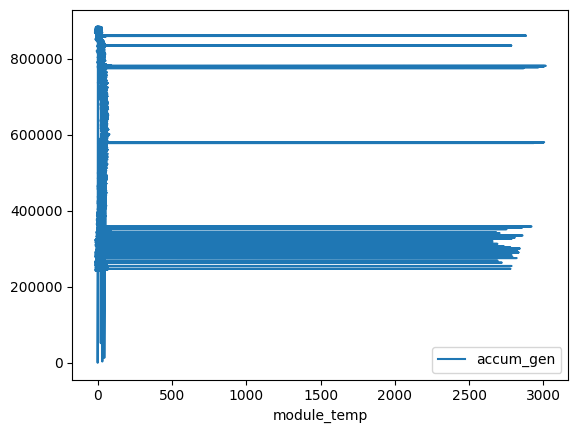

In [ ]:
# 태양 전지판 온도와 발전량의 관계
agent.run("모듈(태양 전지판)의 온도가 증가할 때 발전량은 어떻게 변화하는가?")

질문 예시
```
각 월별로 평균 발전량은 어떻게 변화하는가?
모듈(태양 전지판)의 온도가 증가할 때 발전량은 어떻게 변화하는가?
하루 중 어느 시간대에 발전량이 가장 많은가? 그리고 그 시간대에는 복사량은 어떠한가?
외부 온도가 높거나 낮을 때 발전량에 어떤 영향을 미치는가?
전력 계수가 1에 가깝다는 것은 시스템이 효율적으로 작동하고 있다는 것을 의미합니다. 얼마나 많은 데이터 포인트에서 전력 계수가 0.9 이상인가?
경사 각도와 수평 각도에서의 복사량이 증가할 때 발전량은 어떻게 변화하는가?
인버터의 용량 대비 실제로 얼마나 많은 전력이 생성되는가?
인버터의 전압 및 전류는 시간에 따라 어떻게 변동하는가? 이러한 변동이 발전량에 어떤 영향을 미치는가?
다양한 inver_id를 가진 인버터 간에 발전 효율이나 성능에 차이가 있는가?
라인과 인버터 사이의 전압 및 전류 관계는 어떠한가?
```

### 2-2. 챗봇 만들기

In [ ]:
def respond(message, chat_history):  # 채팅봇의 응답을 처리하는 함수를 정의합니다.
    agent = create_pandas_dataframe_agent(
    OpenAI(temperature=0),
    df2, verbose=False)

    agent.run(message)
    bot_message = agent.run(message)


    chat_history.append((message, bot_message))  # 채팅 기록에 사용자의 메시지와 봇의 응답을 추가합니다.

    return "", chat_history  # 수정된 채팅 기록을 반환합니다.

with gr.Blocks() as demo:  # gr.Blocks()를 사용하여 인터페이스를 생성합니다.
    chatbot = gr.Chatbot(label="채팅창")  # '채팅창'이라는 레이블을 가진 채팅봇 컴포넌트를 생성합니다.
    msg = gr.Textbox(label="입력")  # '입력'이라는 레이블을 가진 텍스트박스를 생성합니다.
    clear = gr.Button("초기화")  # '초기화'라는 레이블을 가진 버튼을 생성합니다.

    msg.submit(respond, [msg, chatbot], [msg, chatbot])  # 텍스트박스에 메시지를 입력하고 제출하면 respond 함수가 호출되도록 합니다.
    clear.click(lambda: None, None, chatbot, queue=False)  # '초기화' 버튼을 클릭하면 채팅 기록을 초기화합니다.

demo.launch(debug=True)  # 인터페이스를 실행합니다. 실행하면 사용자는 '입력' 텍스트박스에 메시지를 작성하고 제출할 수 있으며, '초기화' 버튼을 통해 채팅 기록을 초기화 할 수 있습니다.

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
